In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

hour_result = pd.read_csv('../../model/output/check_hour.csv')
input_data = pd.read_csv('../../model/input/ricca_test_wind0.csv')
growth_param = pd.read_csv('growth_param.csv')

In [2]:
assim = hour_result['assim'].tolist()
dvs = hour_result['dvs'].tolist()
Ta = input_data['Tair'].tolist()

In [3]:
### Parameters for Chinese cabbage
Tbase  = 0.0           # base temperature
dm     = 0.6           # max root depth
dg     = 0.012         # root elongation rate (m/day)
hgt    = 0.4           # mean plant height (m)
width  = 0.20          # mean leaf width (m)
laicr  = 3             # lai critical for leaf death

### Constants for maintenace respiration at 25C for various plant parts
kgl  = 0.03            # for green leaves (gCH2O/gDM/day)
kr   = 0.015           # for root (gCH2O/gDM/day)
ko   = 0.020           # for rep. org

### Glucose requirement for synthesis of various plant parts
ggl  = 1.463           # for green leaves (gCH2O/gDM)
gr   = 1.444           # for root (gCH2O/gDM)
go   = 1.463

# ## Table for partitioning
istage = [0.00, 0.50, 0.95, 1.00, 1.10, 2.00]         # stage
ifgl   = [0.92, 0.93, 0.94, 0.70, 0.00, 0.00]         # green leaf ratio
ifr    = [0.08, 0.07, 0.05, 0.00, 0.00, 0.00]         # root ratio
ifo    = [0.00, 0.00, 0.01, 0.30, 1.00, 1.00]

## ratio to DM / CH2O
cd     = 1.125         # factor convert mass to CH2O weight, = mass * 45%C / C_MW * CH2O_MW

## ratio of fresh weight to dry weight of leaf
FDR    = 16.76

## time conversion
time  = 'hour'
conv  = 1/24 if time == 'hour' else 1

wgls = 1.0
wrs = 0.2
wos = 0.0
maints = 0.0
rootds = 0.0

In [4]:
wgl = growth_param['wgl'].to_list()
wr = growth_param['wr'].to_list()
wo = growth_param['wo'].to_list()
maint = []

growCalc

In [5]:
corr = 1 / 24
RDT = 1.0

assim_c = []

for i in range(len(assim)):
    assimc = assim[i] * RDT
    assim_c.append(assimc)

# assim_c

ddage = []

for i in range(len(dvs)):
    if (dvs[i] > 0.9 and dvs[i] < 1.9):
        ddages = (0.05 / (2.0 - dvs[i])) * conv
        ddage.append(ddages)
    elif dvs[i] >= 1.9:
        ddages = (0.05 / 0.1) * conv
        ddage.append(ddages)
    else:
        ddages = 0.0
        ddage.append(ddages)

In [6]:
mgl = []
mr = []
mo = []
RM = []

for i in range(len(wgl)):
    mgl.append(wgl[i] * kgl)
    mr.append(wr[i] * kr)
    mo.append(wo[i] * ko)
    RM.append(mgl[i] + mo[i])

tempRM = []
RMpr = []

for i in range(len(RM)):
    tempRM.append((RM[i] * 2 **((Ta[i] - 20)/10))*corr)  # temperature   from Teh
    RMpr.append(min(tempRM[i], assim_c[i]))

In [7]:
fgl = []
fr = []
fo = []

for i in range(len(dvs)):
    fgl.append(np.interp(dvs[i], istage, ifgl))
    fr.append(np.interp(dvs[i], istage, ifr))
    fo.append(np.interp(dvs[i], istage, ifo))

fgl

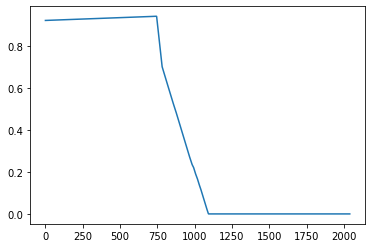

In [8]:
plt.plot(fgl);

fr

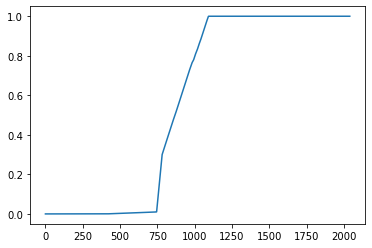

In [9]:
plt.plot(fo);

fo

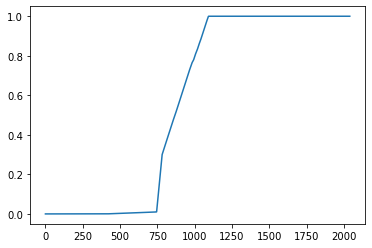

In [10]:
plt.plot(fo);

In [11]:
fggl = []
fgr = []
fgo = []
GT = []

for i in range(len(fgl)):
    fggl.append(fgl[i] * ggl)
    fgr.append(fr[i]  * gr)
    fgo.append(fo[i]  * go)
    GT.append(fggl[i] + fgr [i]+ fgo[i])
# plt.plot(GT);

In [12]:
available = []

for i in range(len(RMpr)):
    avail = ((assim_c[i] - RMpr[i]) / GT[i])
    avail *= 0.84
    available.append(avail)

#############################################

# res = {'assim_c':[], 'RMpr':[], 'GT':[]}
# for i in range(len(assim_c)):
#     res['assim_c'].append(assim_c[i])
#     res['RMpr'].append(RMpr[i])
#     res['GT'].append(GT[i])
#
# check = pd.DataFrame(res)
# check.to_csv('check.csv')

In [13]:
gr_gl = []
gr_r = []
gr_o = []
gr_dl = []

for i in range(len(available)):
    gr_gl.append(fgl[i] * available[i])
    gr_r.append(fr[i]  * available[i])
    gr_o.append(fo[i]  * available[i])
    gr_dl.append(ggl * ddage[i])

In [14]:
wgl_nb = []
wr_nb = []
wo_nb = []
maint_nb = []

for i in range(len(gr_gl)):
    wgls += (gr_gl[i] - gr_dl[i])
    wrs += (gr_r[i])
    wos += (gr_o[i])
    wgl_nb.append(wgls)
    wr_nb.append(wrs)
    wo_nb.append(wos)

In [15]:
# res = {'wgl_nb':[], 'wr_nb':[], 'wo_nb':[]}
# for i in range(len(wgl)):
#     res['wgl_nb'].append(wgl_nb[i])
#     res['wr_nb'].append(wr_nb[i])
#     res['wo_nb'].append(wo_nb[i])
#
# check = pd.DataFrame(res)
# check.to_csv('check.csv')

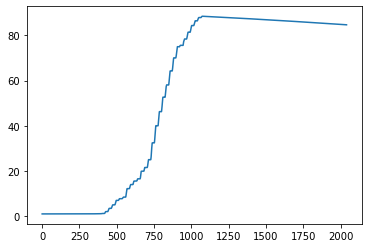

In [16]:
plt.plot(wgl_nb);